## Introduction to Logistic Regression

Logistic Regression is a staple algorithm in machine learning, often used for classification tasks. It's particularly well-suited for binary classification, such as determining whether an email is spam or not spam.

### What is Logistic Regression?

Logistic Regression is a statistical method for predicting binary outcomes from data. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value.

## How Does Logistic Regression Work?

The process of Logistic Regression is as follows:
1. **Model Setup**: A model is created with initial weights, often initialized to zero.
2. **Prediction**: Each input feature $x_i$ is multiplied by its corresponding weight $w_i$. The results are summed and passed through the sigmoid function, yielding a probability between 0 and 1.
3. **Thresholding**: The probability is compared to a threshold, typically 0.5. If the probability is above the threshold, the output is classified as 1; otherwise, it's classified as 0.
4. **Cost Calculation and Weight Update**: The model's performance is evaluated using a cost function, such as cross-entropy loss, and the weights are updated accordingly using gradient descent.

The training process continues iteratively, adjusting the weights to minimize the cost function, until convergence or a maximum number of iterations is reached.

### Benefits of Logistic Regression

- **Probability Estimates**: Provides probabilities for predictions, offering more information than just the final classification.
- **Simplicity and Efficiency**: It's straightforward to implement, interpret, and computationally efficient.
- **Versatility**: Can be used for various classification problems and is a foundational concept for understanding more complex algorithms in machine learning.

### Logistic Regression Implementation

We will start by importing necessary libraries for our Logistic Regression model:

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme with a specific style and palette
sns.set_theme(style="whitegrid", palette="pastel")

## Dataset Overview

In this section, we will be working with a dataset that focuses on CO2 emissions from various car models, incorporating different properties of the cars. This dataset is particularly relevant as it offers insights into the environmental impact of different vehicles, a critical aspect in the era of climate change awareness.

### Data Source

The dataset is compiled from Canadian sources and encompasses a range of car properties including make, model, fuel type, and engine size. Such comprehensive data allows for a analysis of factors contributing to CO2 emissions. The dataset can be found at [this link](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles).

In [142]:
# Import the data - CO2 emissions based on car model and other car properties (Canadian Data)
car_df = pd.read_csv("Data/CO2_Emissions_Canada.csv")

# Look at the file
car_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


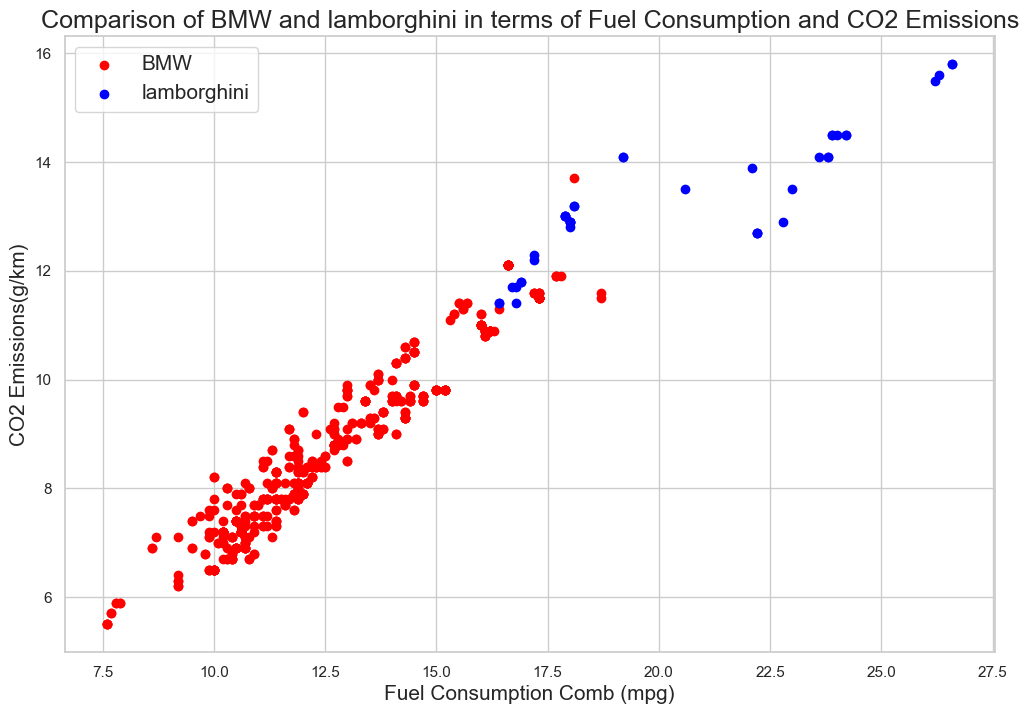

In [143]:
#find non-linearly seperable data in this dataset

# Filter the dataset for BMW and lamborghini
bmw = car_df[car_df['Make'] == "BMW"]
lamborghini = car_df[car_df['Make'] == "LAMBORGHINI"]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# BMW data
ax.scatter(bmw['Fuel Consumption City (L/100 km)'],
           bmw['Fuel Consumption Hwy (L/100 km)'],
           color="red",
           label="BMW")

# lamborghini data
ax.scatter(toyota['Fuel Consumption City (L/100 km)'],
           toyota['Fuel Consumption Hwy (L/100 km)'],
           color="blue",
           label="lamborghini")

# Setting labels and title
ax.set_xlabel("Fuel Consumption Comb (mpg)", fontsize=15)
ax.set_ylabel("CO2 Emissions(g/km)", fontsize=15)
ax.legend(fontsize=15)
ax.set_title("Comparison of BMW and lamborghini in terms of Fuel Consumption and CO2 Emissions", fontsize=18)

# Show plot
plt.show()


There is significant overlap of the data, and so it can't be well seperated using linear regression. We will attempt to use the Logistic Regression.

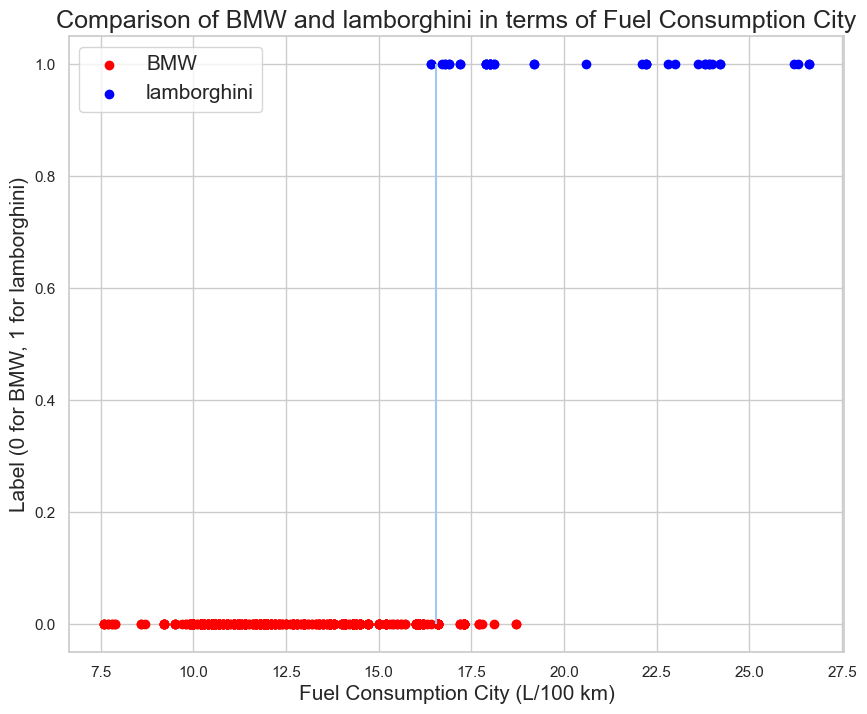

In [144]:
# Find the average of both
bmw_avg_fuel_city = bmw['Fuel Consumption City (L/100 km)'].mean()
lamborghini_avg_fuel_city = lamborghini['Fuel Consumption City (L/100 km)'].mean()
combined_avg_fuel_city = (bmw_avg_fuel_city + lamborghini_avg_fuel_city) / 2

plt.figure(figsize=(10, 8))
# BMW data
plt.scatter(bmw['Fuel Consumption City (L/100 km)'], 
            np.zeros(len(bmw)),  # Zeroes for BMW
            color="red", 
            label="BMW")

# lamborghini data
plt.scatter(lamborghini['Fuel Consumption City (L/100 km)'], 
            np.ones(len(lamborghini)),  # Ones for lamborghini
            color="blue", 
            label="lamborghini")
plt.vlines(combined_avg_fuel_city, 0.0, 1.0)

plt.xlabel("Fuel Consumption City (L/100 km)", fontsize=15)
plt.ylabel("Label (0 for BMW, 1 for lamborghini)", fontsize=15)
plt.legend(fontsize=15, loc="upper left")
plt.title("Comparison of BMW and lamborghini in terms of City Fuel Consumption", fontsize=18)
plt.show()


We can see the overlap a bit more easily in this graph look at just the City Fuel Consumption.

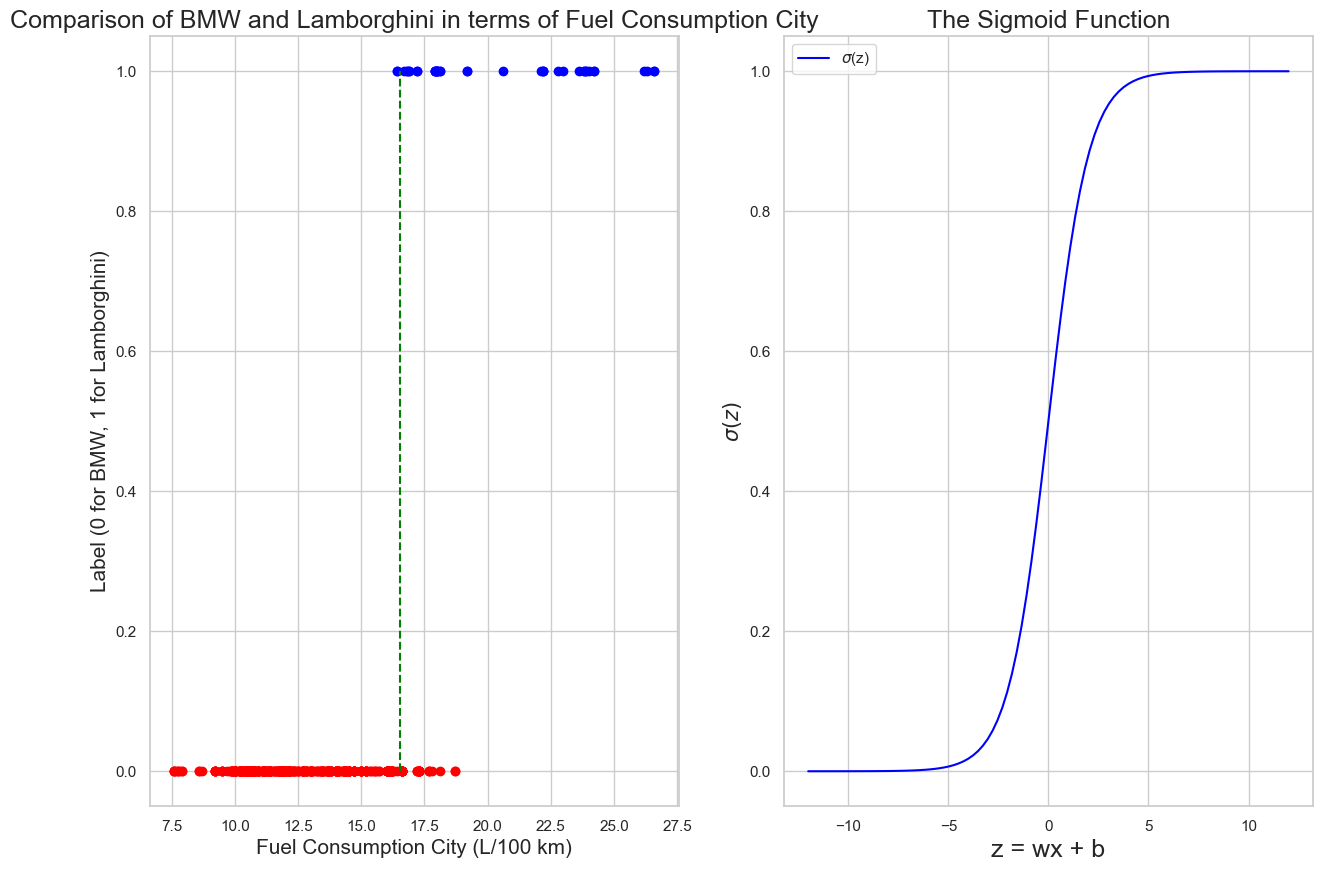

In [145]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Create a figure for the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Plot for BMW and Lamborghini with binary labels
# This assumes bmw and lamborghini dataframes are already defined and filtered from your dataset
ax1.scatter(bmw['Fuel Consumption City (L/100 km)'], 
            np.zeros(len(bmw)),  # Zeroes for BMW
            color="red", 
            label="BMW")
ax1.scatter(lamborghini['Fuel Consumption City (L/100 km)'], 
            np.ones(len(lamborghini)),  # Ones for Lamborghini
            color="blue", 
            label="Lamborghini")
ax1.vlines(combined_avg_fuel_city, 0.0, 1.0, color="green", linestyle='dashed')
ax1.set_xlabel("Fuel Consumption City (L/100 km)", fontsize=15)
ax1.set_ylabel("Label (0 for BMW, 1 for Lamborghini)", fontsize=15)
ax1.set_title("Comparison of BMW and Lamborghini in terms of Fuel Consumption City", fontsize=18)

# Sigmoid Function Plot
domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, sigmoid(domain), color="blue", label="$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize=18)
ax2.set_ylabel("$\sigma(z)$", fontsize=15)
ax2.set_title("The Sigmoid Function", fontsize=18)

plt.legend()
plt.show()


### Visualizing Logistic Regression

In this section, we demonstrate the application of the logistic regression model to classify vehicles as either BMW or Lamborghini based on their city fuel consumption. Additionally, we explore the sigmoid function, which is central to logistic regression. We will now create the Logistic Regression class below:


In [146]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.errors_ = []  # Store the cost in each epoch

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cross_entropy_loss(self, y_hat, y):
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def fit(self, X, y, epochs=1000):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(epochs):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute the loss
            cost = self.cross_entropy_loss(predictions, y)
            self.errors_.append(cost)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.array([1 if i > 0.5 else 0 for i in predictions]) 

    def predict_proba(self, X):
        model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(model)

    # plot_cost_function and plot_decision_boundary taken from lecture
    def plot_cost_function(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label="Cost function")
        ax.set_xlabel("Epochs", fontsize=15)
        ax.set_ylabel("Cost", fontsize=15)
        ax.legend(fontsize=15)
        ax.set_title("Cost Calculated after Each Epoch During Training", fontsize=18)
        plt.show()
    
    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize=(10, 8))
        plot_decision_regions(X, y, clf=self)
        plt.title("Neuron Decision Boundary", fontsize=18)
        plt.xlabel(xstring, fontsize=15)
        plt.ylabel(ystring, fontsize=15)
        plt.show()


In [147]:
# Initialize your logistic regression neuron
node = LogisticRegression(learning_rate=0.1)

# Prepare your data
X = car_df[car_df['Make'].isin(['BMW', 'LAMBORGHINI'])]['Fuel Consumption City (L/100 km)'].values
X = X.reshape(-1, 1)
y = car_df[car_df['Make'].isin(['BMW', 'LAMBORGHINI'])]['Make'].apply(lambda x: 0 if x == 'BMW' else 1).values

# Train the model
node.fit(X, y, epochs=100_000)

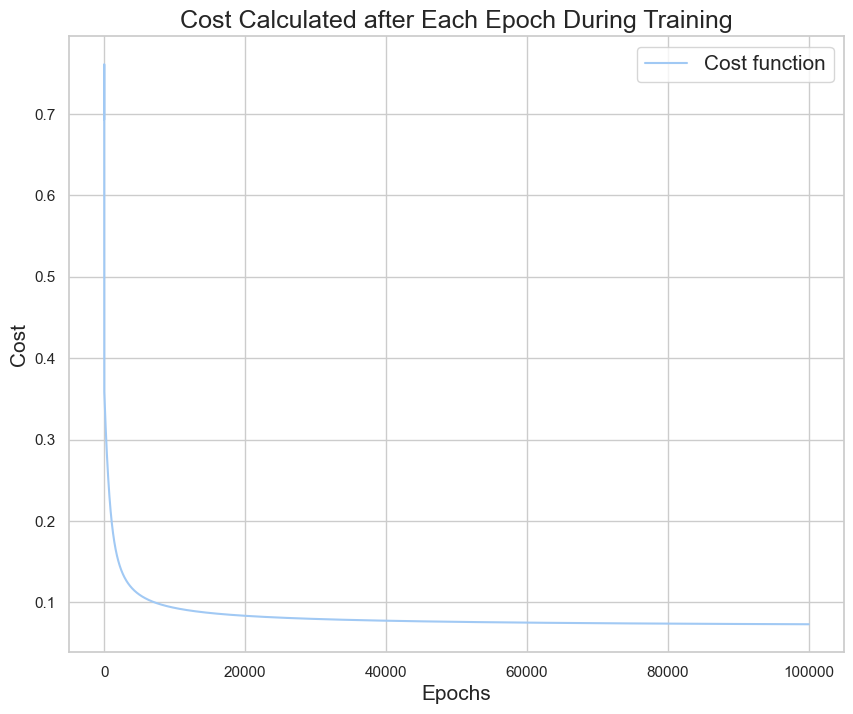

In [148]:
node.plot_cost_function()
plt.show()

## Analyzing Model Performance Over Training Epochs

After training our logistic regression model with a learning rate of 0.1 for 100,000 epochs, we use `node.plot_cost_function()` to visualize the model's performance over time.

As the number of epochs increases, the cost decreases, but the cost decrease stagnates at around 10,000 epochs.

This graph confirms that our neuron is learning over time.

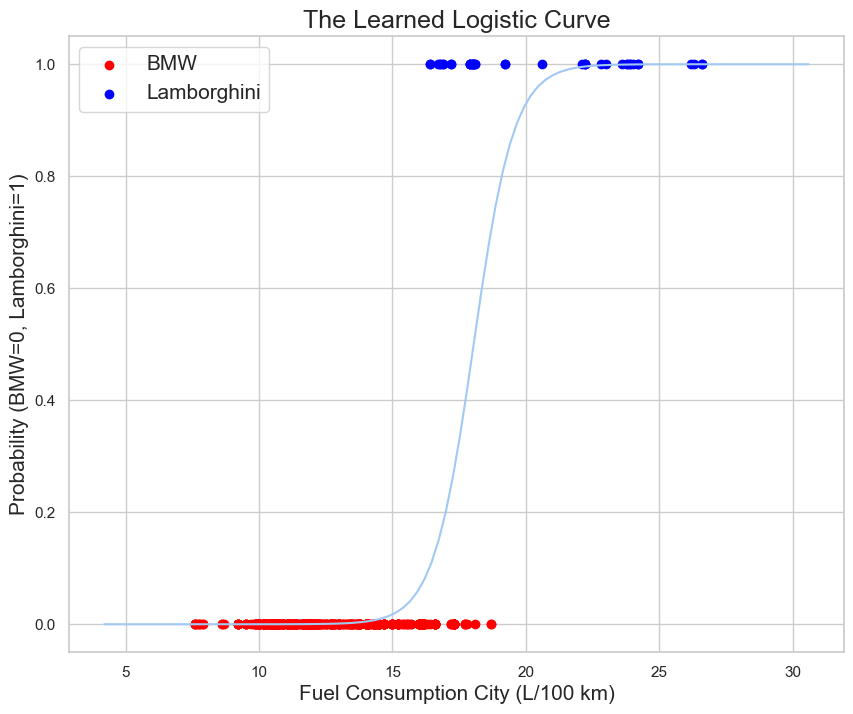

In [149]:
# Assuming you've already defined 'bmw', 'lamborghini', and 'node' from your previous work
plt.figure(figsize=(10, 8))

# Plotting BMW and Lamborghini data
plt.scatter(bmw['Fuel Consumption City (L/100 km)'], 
            np.zeros(len(bmw)),  # Zeroes for BMW
            color="red", 
            label="BMW")
plt.scatter(lamborghini['Fuel Consumption City (L/100 km)'], 
            np.ones(len(lamborghini)),  # Ones for Lamborghini
            color="blue", 
            label="Lamborghini")

# Defining the domain for the logistic curve
# Ensure the domain covers the range of 'Fuel Consumption City (L/100 km)' in your data
domain = np.linspace(car_df['Fuel Consumption City (L/100 km)'].min(), 
                     car_df['Fuel Consumption City (L/100 km)'].max(), 
                     100)
# Predict over the domain using the trained model
plt.plot(domain, node.predict_proba(domain.reshape(-1, 1)))

plt.xlabel("Fuel Consumption City (L/100 km)", fontsize=15)
plt.ylabel("Probability (BMW=0, Lamborghini=1)", fontsize=15)
plt.legend(fontsize=15, loc="upper left")
plt.title("The Learned Logistic Curve", fontsize=18)
plt.show()

In [150]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.03697183098591549


There is a very low classification error which is a good sign.

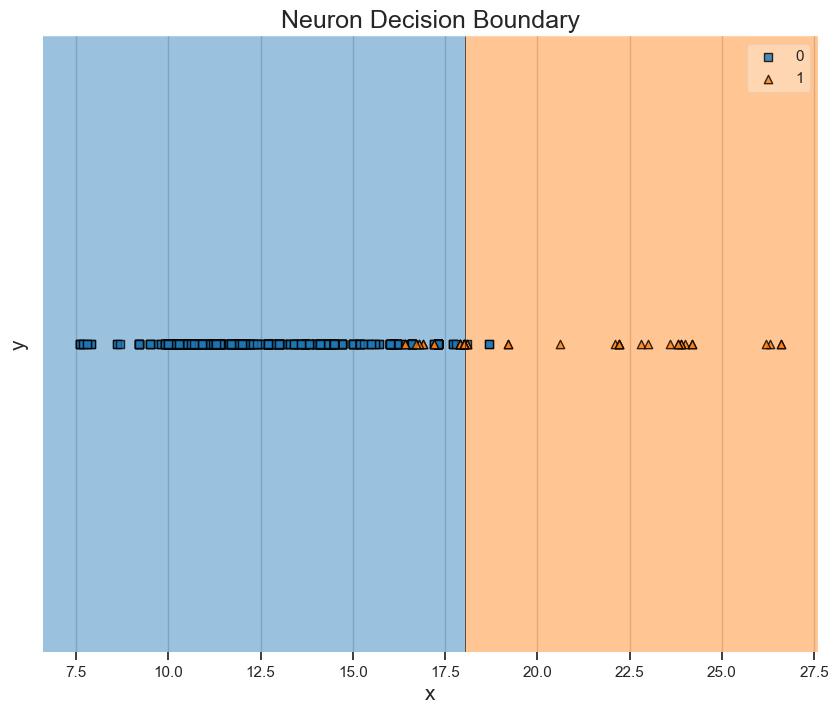

In [151]:
node.plot_decision_boundary(X, y)
plt.show()

The decision boundary does a good job predicting the make of a car with minimal error.

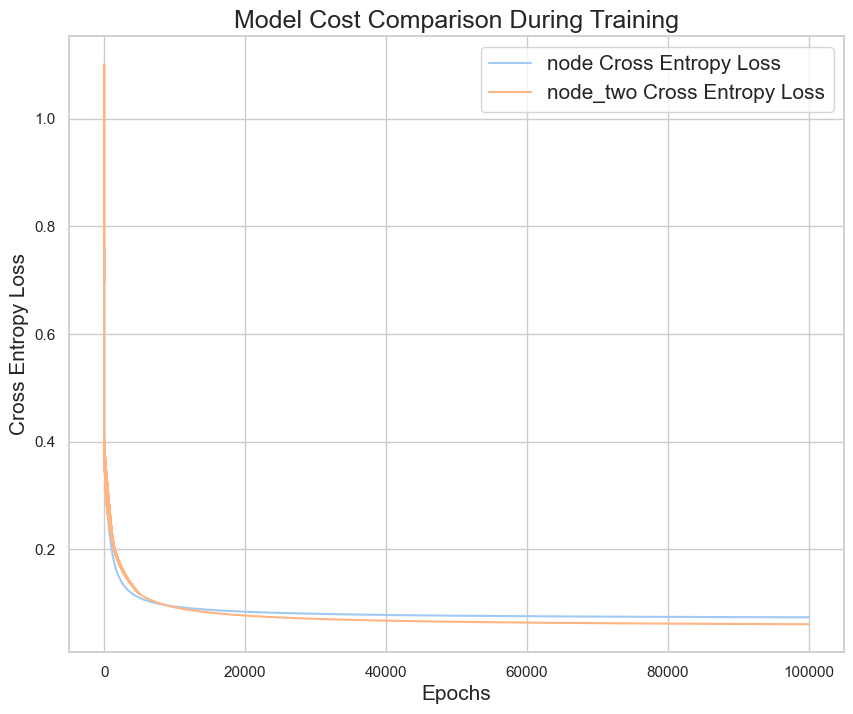

In [152]:
# Create a new logistic regression neuron
node_two = LogisticRegression(learning_rate=0.1)

# 'Fuel Consumption City (L/100 km)' and 'Fuel Consumption Hwy (L/100 km)' features
X_two = car_df[car_df['Make'].isin(['BMW', 'LAMBORGHINI'])][['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']].values
y_two = np.where(car_df[car_df['Make'].isin(['BMW', 'LAMBORGHINI'])]['Make'] == "BMW", 0, 1)

# Train the logistic regression model on the selected feature vectors
node_two.fit(X_two, y_two, epochs=100000)

# Plot the comparison of the cost functions
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label="node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label="node_two Cross Entropy Loss")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Cross Entropy Loss", fontsize=15)
plt.legend(fontsize=15)
plt.title("Model Cost Comparison During Training", fontsize=18)
plt.show()

After several tests with different learning rates and epochs, it is very clear that in this case, the two features have roughly the same cost. Increasing the learning rate led to instability in the models, and decreasing have very little change.

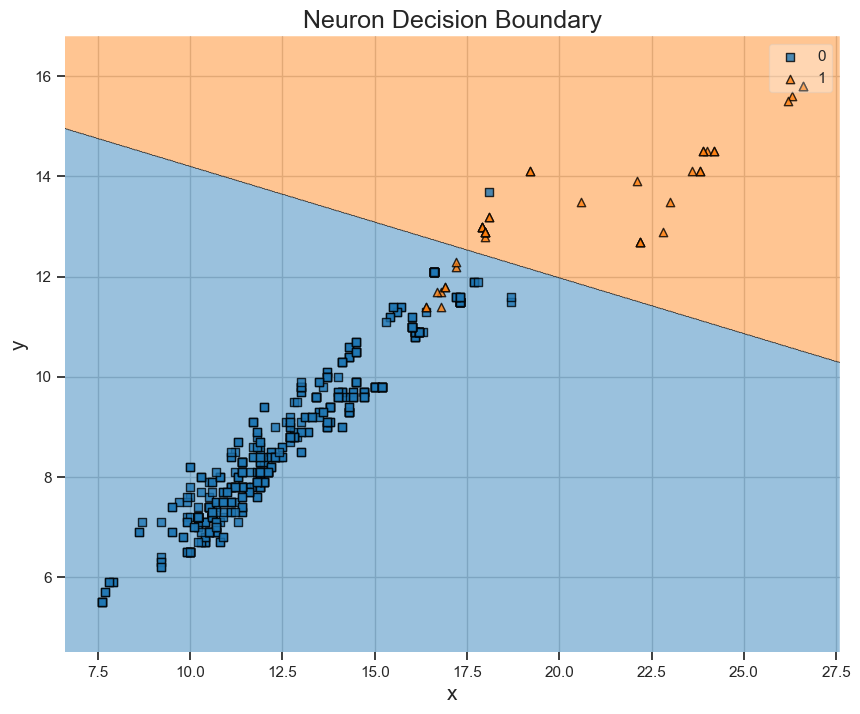

In [153]:
node_two.plot_decision_boundary(X_two, y)

The decision boundary for node 2 also does a good job predicting the make of a car with minimal error. There appears to roughly the same results as for node 1.